# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.



## 1. Load and inspect the data

You may use either the car dataset from today's lesson 

1. Load the dataset and inspect it

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:

import pandas as pd
df = pd.read_csv('/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/06-week/6.05-random-forests/assets/datasets/car.csv')
df.head()


,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [85]:
df.acceptability.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [86]:
df.isnull().any()

buying           False
maint            False
doors            False
persons          False
lug_boot         False
safety           False
acceptability    False
dtype: bool

In [88]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df['acceptability'])
X = pd.get_dummies(df.drop('acceptability', axis=1))

X.head() # did it work?


,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split


# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=99)

## 2. Decision Tree Classifier


1. Train a decision tree on the data and estimate the buy likelihood

In [90]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_tree = dt.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_tree)

s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3))
print s
#df.plot(kind='scatter', x='a', y='b');

0.974537037037
Decision Tree Score:	0.969 ± 0.01
[ 0.95493934  0.97916667  0.97391304]


In [91]:
cv = StratifiedKFold(y_pred_tree, n_folds=3, shuffle=True, random_state=41)
s_p = cross_val_score(dt, X_test, y_pred_tree, cv=cv, n_jobs=-1)
#print "{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3))
print s_p

[ 0.88356164  0.90972222  0.92253521]


In [92]:
df2 = pd.DataFrame(s,columns=["real"])

In [93]:
df22 = pd.DataFrame(s_p,columns=["pred"])


In [94]:
result = pd.concat([df2, df22], axis=1)

In [77]:
result

,real,pred
0,0.098958,0.595890
1,0.081597,0.687500
2,0.100694,0.633803


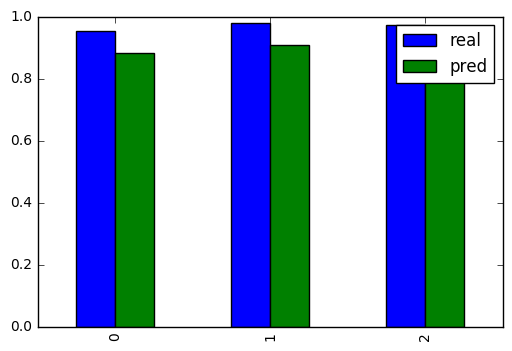

In [95]:
result.plot(kind='bar');

## 3. Random Forest Classifier


1. Train a random forest on the data and estimate the acceptability
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?


In [103]:
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)
y_pred_randomforest = rf.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_randomforest)
s = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("RandomForestClassifier", s.mean().round(3), s.std().round(3))



0.935185185185
RandomForestClassifier Score:	0.939 ± 0.013


## Extrarandom

In [97]:
et = ExtraTreesClassifier(n_jobs=-1)
et.fit(X_train,y_train)
y_pred_exrandomforest = et.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_exrandomforest)

s = cross_val_score(et, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("ExtraTreesClassifier", s.mean().round(3), s.std().round(3))


0.93287037037
ExtraTreesClassifier Score:	0.954 ± 0.006


## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the acceptability
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [100]:
from sklearn.ensemble import AdaBoostClassifier
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)
ABC = AdaBoostClassifier()
ABC.fit(X_train,y_train)
y_pred_exrandomforest = ABC.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_exrandomforest)

s = cross_val_score(ABC, X, y, cv=cv)
print "{} Score:\t{:0.3} ± {:0.3}".format("ExtraTreesClassifier", s.mean().round(3), s.std().round(3))


0.81712962963
ExtraTreesClassifier Score:	0.811 ± 0.002


## 4. Gradient Boosting Trees CLassifier


1. Train a Gradient Boosting Trees on the data and estimate the acceptability
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred_exrandomforest = GBC.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_exrandomforest)

s = cross_val_score(GBC, X, y, cv=cv)
print "{} Score:\t{:0.3} ± {:0.3}".format("ExtraTreesClassifier", s.mean().round(3), s.std().round(3))


0.974537037037
ExtraTreesClassifier Score:	0.982 ± 0.006


## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


6. Stakeholder Analysis
Recall our discussion of stakeholders and how to best communicate with them. Come up with two specific stakeholders and for each one:
Identify two questions each stakeholder may have regarding cars that you can answer from the data and your models. (This should be at least four questions total - at least two for each stakeholder.)
Answer each question in a manner that is relevant to that stakeholder and understandable given their technical expertise.

1) reliability: based on my analysis all my models have more than 90 percent accuracy and it shows that my results are reliable.

2)I can chnge the target to safety and find the model for how saftety is important.
3) I can do the features importance and find the important features.

## Bonus:

Take the best model and try to improve it using grid search.